In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)
plt.rcParams['figure.figsize'] = (12,8)

So what we should do now. In the beginning, we have to read our dataset from the second line because in the first line we have odd text and it will prevent to read the table correctly.

In [158]:
loans = pd.read_csv('loans.csv', skiprows=1, low_memory=False) 

In [159]:
print("amount of columns: ",  len(loans.columns))

amount of columns:  115


In [160]:
loans.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-2015,171.62,NaN,Sep-2016,744.0,740.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2016,499.0,0.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,Na

In [161]:
loans.shape

(42538, 115)

Also, we should drop two columns. Such as 'url' and 'desc'. 'url' we will drop because contains the unnecessary link and 'desc' because there is a lot of explanation about every loan.

In [162]:
loans = loans.drop(['url','desc'],axis=1) 

Also, we should drop columns which have a lot of missing cells. If there are, more then half of all data, missing values, we will drop this column. 

In [163]:
half_count = len(loans) / 2
loans = loans.dropna(thresh=half_count,axis=1)

So, in the beginning, there were n columns and we reduce this amount to ...

In [164]:
print("amount of columns ",  len(loans.columns))

amount of columns  56


In [165]:
loans.shape

(42538, 56)

After investigation of all our features I desided that 'id','member_id','funded_amnt','funded_amnt_inv', 'int_rate','sub_grade','emp_title','issue_d' also should be droped.

In [166]:
loans = loans.drop(['id','member_id','funded_amnt','funded_amnt_inv',
             'int_rate','sub_grade','emp_title','issue_d','zip_code','out_prncp','out_prncp_inv',
             'total_pymnt','total_pymnt_inv', 'total_rec_prncp','total_rec_int', 'total_rec_late_fee',
             'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
             'last_pymnt_amnt'],axis=1)

In [167]:
loans.shape

(42538, 36)

Now, let's take a look to FICO Score. FICO score shows how credit-worthy a person is

42538
42535


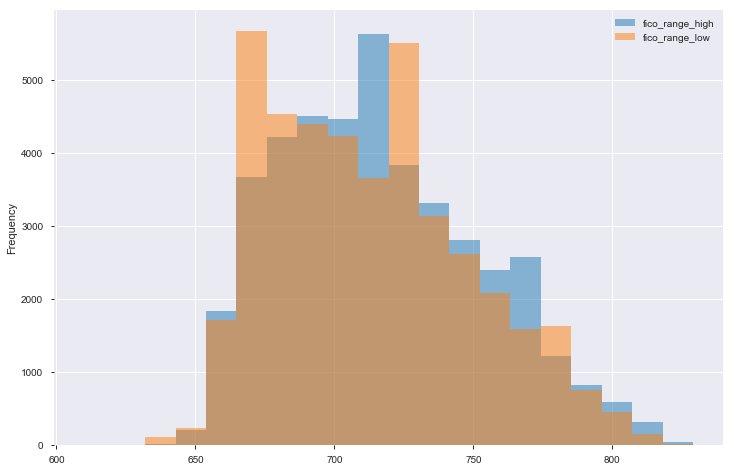

In [168]:
print(loans.shape[0])
loans.dropna(subset=['fico_range_high','fico_range_low'],inplace=True)
print(loans.shape[0])

loans[fico_columns].plot.hist(alpha=0.5,bins=20);

Now, if every borrower has low and high FICO score I think we should find an average between two this values

In [169]:
loans['fico_average'] = (loans['fico_range_high'] + loans['fico_range_low']) / 2

In [170]:
fico_cols = ['fico_range_low','fico_range_high','fico_average']
loans[fico_cols].head()

,fico_range_low,fico_range_high,fico_average
0,735.0,739.0,737.0
1,740.0,744.0,742.0
2,735.0,739.0,737.0
3,690.0,694.0,692.0
4,695.0,699.0,697.0


Now when we have an average between low and high fico, so we can drop odd columns.

In [171]:
loans = loans.drop(['fico_range_low','fico_range_high','last_fico_range_low',
             'last_fico_range_high'], axis=1)
loans.shape

(42535, 33)

And now what I want to predict it's loan status. Loan status is in 'loan_status' column. Let's see which values there we have 

In [172]:
loans["loan_status"].value_counts()

Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

I will choose only two of these values 'Fully Paid' and 'Charged Off' because only these values describe what I want to predict. So I should remove all other loans and transform our two main values to 1 and 0

In [173]:
loans = loans[(loans["loan_status"] == "Fully Paid") | (loans["loan_status"] == "Charged Off")]

dictionary = {"loan_status":{ "Fully Paid": 1, "Charged Off": 0}}
loans = loans.replace(dictionary)

If we look at the dataFrame, we will see that there are columns where is only one value. We don't need such columns.

In [174]:
loans = loans.loc[:,loans.apply(pd.Series.nunique) != 1]

Now we should deal with missing values

I will use method isnull() and sum(). isnull() to know if column has missing values and sum() to count them

In [175]:
print(loans.isnull().sum())

loan_amnt                  0
term                       0
installment                0
grade                      0
emp_length              1057
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
pymnt_plan                 0
purpose                    0
title                     11
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
last_credit_pull_d         2
pub_rec_bankruptcies     697
fico_average               0
dtype: int64


I will use .dropna() to drop all rows with missing values and .drop() to drop whole column

In [177]:
loans = loans.drop("pub_rec_bankruptcies",axis=1)
loans = loans.dropna()

In [178]:
loans.shape

(38123, 24)

In [179]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38123 entries, 0 to 39785
Data columns (total 24 columns):
loan_amnt              38123 non-null float64
term                   38123 non-null object
installment            38123 non-null float64
grade                  38123 non-null object
emp_length             38123 non-null object
home_ownership         38123 non-null object
annual_inc             38123 non-null float64
verification_status    38123 non-null object
loan_status            38123 non-null int64
pymnt_plan             38123 non-null object
purpose                38123 non-null object
title                  38123 non-null object
addr_state             38123 non-null object
dti                    38123 non-null float64
delinq_2yrs            38123 non-null float64
earliest_cr_line       38123 non-null object
inq_last_6mths         38123 non-null float64
open_acc               38123 non-null float64
pub_rec                38123 non-null float64
revol_bal              38123 

Like we see from method info there are a lot of column with object type. This means that we should transform all these strings to ints

In [180]:
print(loans['revol_util'][0])

83.7%


Column 'revol_unit' has numeric value but it has object type. So what we should do. At first, we should use str.rstrip() to strip the sign % and after that we will convert it to float type

In [181]:
loans['revol_util'] = loans['revol_util'].str.rstrip('%').astype('float')

In [182]:
def show_unique(name):
    print(name,' -> ')
    print(loans[name].value_counts(),'\n')

In [183]:
show_unique('home_ownership')

home_ownership  -> 
RENT        18271
MORTGAGE    16945
OWN          2808
OTHER          96
NONE            3
Name: home_ownership, dtype: int64 



In [184]:
show_unique('grade')

grade  -> 
B    11545
A     9675
C     7801
D     5086
E     2715
F      993
G      308
Name: grade, dtype: int64 



In [185]:
show_unique('verification_status')

verification_status  -> 
Not Verified       16391
Verified           12070
Source Verified     9662
Name: verification_status, dtype: int64 



In [186]:
show_unique('emp_length')

emp_length  -> 
10+ years    8715
< 1 year     4542
2 years      4344
3 years      4050
4 years      3385
5 years      3243
1 year       3207
6 years      2198
7 years      1738
8 years      1457
9 years      1244
Name: emp_length, dtype: int64 



In [187]:
show_unique('term')

term  -> 
 36 months    28234
 60 months     9889
Name: term, dtype: int64 



In [188]:
show_unique('addr_state')

addr_state  -> 
CA    6833
NY    3657
FL    2741
TX    2639
NJ    1802
IL    1476
PA    1460
VA    1359
GA    1340
MA    1292
OH    1167
MD    1020
AZ     819
WA     796
CO     755
NC     747
CT     719
MI     684
MO     653
MN     586
NV     473
SC     461
WI     433
OR     427
AL     424
LA     422
KY     315
OK     289
KS     253
UT     250
AR     232
DC     211
RI     195
NM     182
HI     166
WV     165
NH     159
DE     110
WY      79
MT      78
AK      77
SD      60
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64 



We will drop the columns which have to much unique values.

In [189]:
print(loans['last_credit_pull_d'].unique())

['Sep-2016' 'Apr-2016' 'Jan-2016' 'Dec-2014' 'Dec-2015' 'Aug-2013'
 'Apr-2015' 'May-2014' 'Jul-2015' 'Feb-2016' 'Jun-2016' 'Mar-2014'
 'Sep-2012' 'Jan-2015' 'Jun-2012' 'Mar-2016' 'Mar-2015' 'Sep-2014'
 'Apr-2014' 'Oct-2014' 'Feb-2014' 'Feb-2013' 'Nov-2015' 'Jul-2014'
 'Dec-2012' 'Aug-2016' 'Oct-2012' 'Nov-2013' 'Nov-2014' 'Jul-2016'
 'Jun-2015' 'Mar-2013' 'Feb-2012' 'Oct-2015' 'May-2016' 'Apr-2012'
 'Sep-2013' 'Sep-2015' 'May-2013' 'Aug-2015' 'Jun-2014' 'Aug-2012'
 'Jan-2012' 'Aug-2014' 'Oct-2013' 'Dec-2013' 'May-2012' 'Jul-2012'
 'Jan-2014' 'Jun-2013' 'Apr-2013' 'Nov-2012' 'May-2015' 'Jul-2013'
 'Feb-2015' 'Mar-2012' 'Nov-2011' 'Dec-2011' 'Jan-2013' 'Oct-2011'
 'Sep-2011' 'Aug-2011' 'Jul-2011' 'Jun-2011' 'May-2011' 'Apr-2011'
 'Mar-2011' 'Feb-2011' 'Jan-2011' 'Dec-2010' 'Nov-2010' 'Oct-2010'
 'Sep-2010' 'Aug-2010' 'Jul-2010' 'Jun-2010' 'May-2010' 'Apr-2010'
 'Feb-2010' 'Mar-2010' 'Aug-2007' 'Jan-2010' 'Dec-2009' 'Nov-2009'
 'Oct-2009' 'Sep-2009' 'Jul-2009' 'Aug-2009' 'May-2009' 'Jun-2

In [190]:
print(loans['addr_state'].unique())

['AZ' 'GA' 'IL' 'CA' 'NC' 'TX' 'VA' 'MO' 'CT' 'UT' 'FL' 'NY' 'PA' 'MN'
 'NJ' 'OR' 'KY' 'OH' 'SC' 'RI' 'LA' 'MA' 'WA' 'WI' 'AL' 'KS' 'NV' 'AK'
 'CO' 'MD' 'WV' 'VT' 'MI' 'DC' 'SD' 'NH' 'AR' 'NM' 'MT' 'HI' 'WY' 'OK'
 'DE' 'MS' 'TN' 'IA' 'NE' 'ID' 'IN' 'ME']


In [191]:
print(loans['title'].unique())

['Computer' 'bike' 'real estate business' ... 'Retiring credit card debt'
 'MBA Loan Consolidation' 'JAL Loan']


In [192]:
print(loans['earliest_cr_line'].unique())

['Jan-1985' 'Apr-1999' 'Nov-2001' 'Feb-1996' 'Nov-2004' 'Jul-2005'
 'Jan-2007' 'Apr-2004' 'Sep-2004' 'Jan-1998' 'Oct-1989' 'Jul-2003'
 'May-1991' 'Sep-2007' 'Oct-1998' 'Aug-1993' 'Oct-2003' 'Jan-2001'
 'Nov-1997' 'Feb-1983' 'Jul-1985' 'Apr-2003' 'Jun-2001' 'Feb-2002'
 'Aug-1984' 'Nov-2006' 'Dec-1987' 'Nov-1981' 'Apr-2005' 'Oct-2007'
 'Dec-2000' 'Apr-2007' 'Jan-2003' 'Mar-1994' 'Sep-1998' 'Jun-2004'
 'Nov-1995' 'Jul-1999' 'Jun-1995' 'Sep-1992' 'Jan-2002' 'Apr-1992'
 'Oct-2006' 'May-2000' 'Dec-1998' 'Dec-2004' 'Oct-2000' 'May-2002'
 'May-2006' 'Jul-2002' 'Jul-2006' 'May-1997' 'Oct-2005' 'Apr-1995'
 'Oct-2002' 'Jan-2000' 'Apr-2000' 'Dec-1994' 'Sep-2005' 'Dec-1984'
 'Dec-1999' 'Nov-2003' 'Jun-1989' 'Jun-2003' 'Oct-1996' 'May-2003'
 'Jun-2002' 'Jun-2007' 'Dec-1996' 'Sep-2002' 'Jan-1986' 'May-1998'
 'Jan-1997' 'Jun-2005' 'Feb-1990' 'Mar-2004' 'Jul-1995' 'Aug-1994'
 'Jun-1992' 'Mar-1997' 'Apr-2006' 'Apr-1990' 'Aug-1999' 'Sep-2000'
 'Feb-2001' 'Dec-1988' 'Feb-1999' 'Dec-1991' 'Aug-2000' 'Oct-2

In [193]:
loans = loans.drop(['last_credit_pull_d','addr_state','title','earliest_cr_line'],axis=1)

In [195]:
mapping_dict = { "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0 },
                "grade":{
        "A": 1,
        "B": 2,
        "C": 3,
        "D": 4,
        "E": 5,
        "F": 6,
        "G": 7
    }
}

loans = loans.replace(mapping_dict)
loans[['emp_length','grade']].head()

,emp_length,grade
0,10,2
1,0,3
2,10,3
3,10,3
5,3,1


In [197]:
nominal_columns = ["home_ownership", "verification_status", "purpose", "term"]
dummy_df = pd.get_dummies(loans[nominal_columns])
loans = pd.concat([loans, dummy_df], axis=1)
loans = loans.drop(nominal_columns, axis=1)

In [198]:
loans.head()

,loan_amnt,installment,grade,emp_length,annual_inc,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,fico_average,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,5000.0,162.87,2,10,24000.0,1,n,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,737.0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2500.0,59.83,3,0,30000.0,0,n,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,742.0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2400.0,84.33,3,10,12252.0,1,n,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,737.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,10000.0,339.31,3,10,49200.0,1,n,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,692.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5,5000.0,156.46,1,3,36000.0,1,n,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,732.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [199]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38123 entries, 0 to 39785
Data columns (total 40 columns):
loan_amnt                              38123 non-null float64
installment                            38123 non-null float64
grade                                  38123 non-null int64
emp_length                             38123 non-null int64
annual_inc                             38123 non-null float64
loan_status                            38123 non-null int64
pymnt_plan                             38123 non-null object
dti                                    38123 non-null float64
delinq_2yrs                            38123 non-null float64
inq_last_6mths                         38123 non-null float64
open_acc                               38123 non-null float64
pub_rec                                38123 non-null float64
revol_bal                              38123 non-null float64
revol_util                             38123 non-null float64
total_acc                     